## 1. Numerical Error

## Part (a)
Write code to generate an array of length $N$, filled with random numbers from a Gaussian distribution (with mean $x$ and standard deviation $\sigma$), and make a histogram (with $m$ bins) of the array values. (You are encouraged to import functions from numpy and matplotlib.pyplot) Test this code, performing at least two sanity checks to make sure it's working properly.

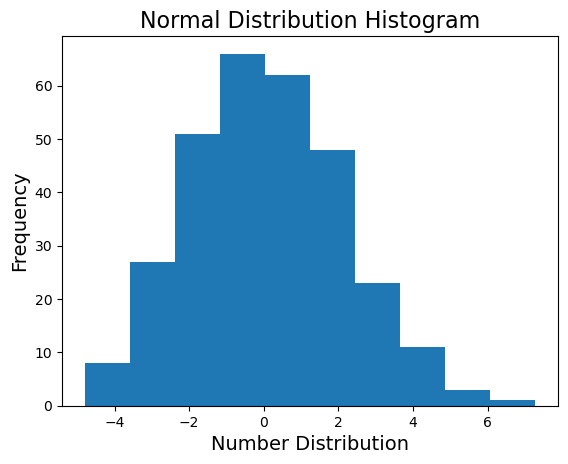

In [9]:
#import papckages 
import numpy as np      
import matplotlib.pyplot as plt 


#specify variables 
N = 300
deviation = 2
mean = 0
my_rand = np.random.normal(mean, deviation, (N))  #use the numpy normal distribution random function 

bins = 10 #specify number of bins and plot 
plt.hist(my_rand, bins) 
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Array Values', fontsize=14)
plt.title('Normal Distribution Histogram', fontsize=16)
plt.show()



## Part (b)
Now write a function to: generate two arrays as in the previous part (where the first Gaussian has  $x_1,\sigma_1$ and the second Gaussian has $x_2,\sigma_2$), make a third array that is the element-wise sum of these two arrays, and make a histogram of the 'array values. The function should take $x_1,\sigma_1, x_2, \sigma_2$ as arguments.

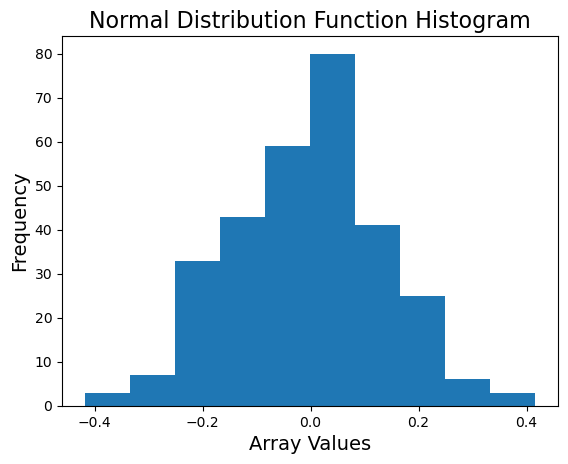

In [16]:
#write function
def rand_gauss_sum(x1, s1, x2, s2, length):
    array1 = np.random.normal(x1, s1, length) #array1
    array2 = np.random.normal(x2, s2, length) #array2
    array3 = np.zeros(length) #blank array3 
    for i in range(length):
        array3[i] = array1[i] + array2[i]   #add the arrays and return them
    return array3


my_rand_2 = rand_gauss_sum(-2, 0.1, 2, 0.1, N) #use function 
plt.hist(my_rand_2, bins)   #plot 
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Array Values', fontsize=14)
plt.title('Normal Distribution Function Histogram', fontsize=16)
plt.show()



## Part (c)

Recall from your physics labs, when you make repeated measurements of a quantity, the measurements follow a Gaussian distribution, where the mean (hopefully) represents the 'true' value of the quantity and the standard deviation represents the statistical uncertainty (error) on the measurement. 
If you make repeated measurements of two different quantities, and use these two quantities to calculate a third quantity, the error propagates, so you have to use error propagation formulas to figure out the uncertainty on the third quantity.

Numerical errors in calculations propagate in a similar manner. We can represent the numerical error on stored value $x$ as $\sigma$, and define our fractional error constant as $C$ such that $\sigma = C |x|$.

Plugging this into the previous part, we get $\sigma_1 = C |x_1|, \sigma_2 = C |x_2|$. Try this with: $N=10^6, m=100, C=10^{-14}, x_1 = 100, x_2 = -100$. (For the purposes of this exercise, we're using a much larger value of $C$ than the machine precision, so that we can see its effect.) Now try again with different mean values: $x_1 = 1.0, x_2 = -1.0$

Hopefully, you now see visually why adding a positive number to a negative number, where both have large absolutely values, can produce large errors.

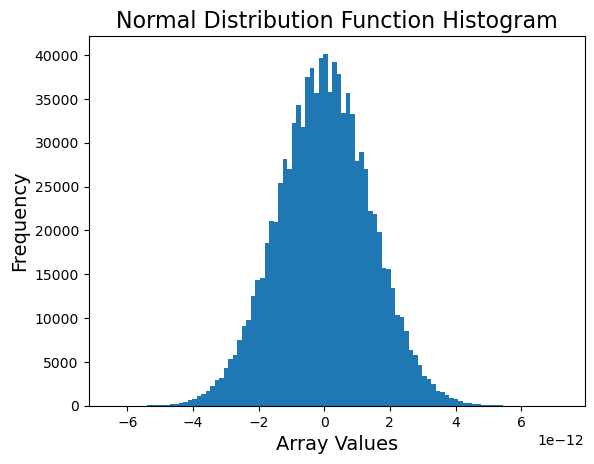

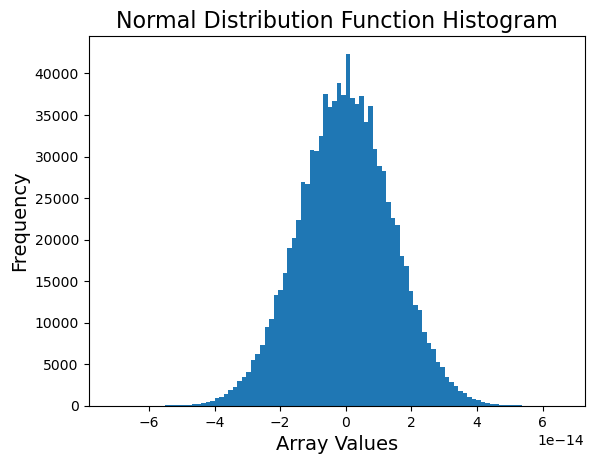

In [20]:
N = 10**6
bins = 100
C = 10**(-14)
x1 = 100
x2 = -100

my_rand_2 = rand_gauss_sum(x1, C*np.abs(x1), x2, C*np.abs(x2), N) #use function 
plt.hist(my_rand_2, bins)   #plot 
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Array Values', fontsize=14)
plt.title('Normal Distribution Function Histogram', fontsize=16)
plt.show()

x1 = 1
x2 = -1

my_rand_2 = rand_gauss_sum(x1, C*np.abs(x1), x2, C*np.abs(x2), N) #use function 
plt.hist(my_rand_2, bins)   #plot 
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Array Values', fontsize=14)
plt.title('Normal Distribution Function Histogram', fontsize=16)
plt.show()

# 2. Approximation Error

Consider this system representing phasor rotation in the complex plane:
    $$\dot Z = i\omega Z, \quad\text{given}\quad Z_0 = Z(t=0).$$
    
The analytical solution is:
    $Z(t) = Z_0 \exp(i\omega t).$

How can we solve it numerically? We could try using its Taylor expansion:
$$\dot Z(t) = \frac{Z(t+\Delta t)-Z(t)}{\Delta t} + H.O.T. = i\omega Z(t).$$
And use a simple algorithm such as: 
* Start with $Z_0$ = $Z(t=0)=Z_{old}$,
* $Z_{new} = (1+i\omega \Delta t)Z_{old}$,
* repeat for a large number $n$ of timesteps until we complete a full rotation

It turns out this simple algorithm is unstable, because of the accumulation of error.

## Part (a)
Write the code to implement the above algorithm, with $\omega, Z_0, n$ as parameters that can be set in the code. You should end up with an array of $t$ values and an array of $Z$ values covering a full rotation.

You may want to make use of numpy.pi

In [32]:
#import numpy as np #(already imported)

def complex_rotation(omega, Z0, n):
    """
    omega: oscillation frequency 
    Z0: initial location at t=0
    n: number of timesteps 
    """
    time = np.linspace(0, 2*np.pi, n) #create time array with num
    dt = time[0] - time[1]  #define a timestep interval 
    Z_arr = np.zeros(n, dtype=np.complex_) #blank Z output array 
    Z_arr[0] = Z0 #redefine first value 
    for i in range(len(time)-1):
        Z_arr[i+1] = ( 1 + (1j*omega*dt) ) * Z_arr[i]  #loop over time to determine next value in the array

    return (time, Z_arr) #return time and the output array Z(t) over one rotation



## Part (b)
Using the code in the previous part, plot $|Z|(t)$ (absolute value of $Z$, as a function of $t$) for $n=200,Z_0=1,\omega=1$ Hz . Is the result what you expected? Why?

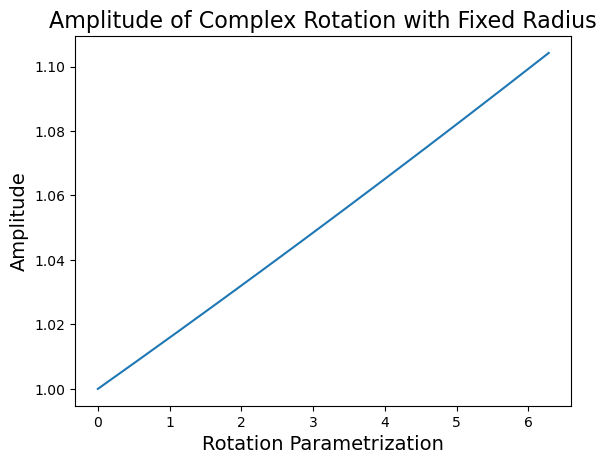

In [36]:
#import matplotlib.pyplot as plt #(already imported)

#define vars
w = 1
Z_0 = 1
num = 200
test_Z = complex_rotation(w, Z_0, num) #create array using function
abs_Z = np.abs(test_Z[1]) #take absolute value 
time = test_Z[0] #time output

plt.plot(time, abs_Z)
plt.xlabel('Rotation Parametrization', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.title('Amplitude of Complex Rotation with Fixed Radius', fontsize=16)
plt.show()


Not what I expected: it should be a horizontally straight line, since $|Z(t)| = |Z_0e^{i\omega t}| = Z_0$ has a fixed length, so we should expect the amplitude to be the same. It seems as though there is an accumulation of error as time progresses, since python should recognize that the changing term $(1+i\omega \Delta t)Z_{old}$ is only changing with respect to the imaginary component. Looking back at that formula, one can see that the way this algorithm is designed actually gives the correct result in the plot, since for every timestep the magnitude of $Z_{new}$ increases slightly, although this should be a constant value in amplitude. Attribute to error in the complex definition.